In [38]:
import matplotlib.pyplot as plt
import numpy as np

## TODO
* make some plots interactive, which is always a nightmare in jupyter notebooks
  - plot showing loss between points.
* two dimensional loss function showin w and b.
* interactive plot displaying associated loss with associated network in linear model.

## Theory

Goal of a neural network: Implement a mathematical function that maps inputs to outputs. Example of functions:

$$
\begin{split}
    y = 3*x+4\\
    y = \log(3*x^2)\\
    y = 3*\max(0, x^3 + 4)^2\\
\end{split}
$$

The basic (vanila) Neural networks implement functions that are composed from linear operations plus a set non linear operations, one after the other. Then there are more advanced ones but in essence everything relies on linear operation + non linear operation one after the other.
    
Neural network in practice: It is a computational graph, i.e., a set of operations that transforms some input into some output in a computer. In modern neural networks, we have somehow gone from the traditional purely linear + non-linear operation and so we might refer to a Neural network with a specific arquitecture. In other words, any of the functions above can now days be understood as a neural network but from the beginning we will always think in functions created by:

$$
y = \phi(\sum^{N^l}_{i=1} w^l_i *...\phi(\sum^{N^0}_{i=1} w^0_i * x^0_i))
$$

where $l$ refers to a layer in the model, $\phi$ is the non-linear function and $N^l$ refers to the number of neurons at the input to layer $l$. This equation is not precise since the projection at the first layer $\phi(\sum^{N^0}_{i=1} w^0_i * x^0_i))$ is a projection from $N^0$ input neurons to $1$ neuron, while the projection at layer $l$ is assuming we have $N^l$ inputs at that layer. This error is due to the fact that expressing this set of concatenated operations is hard using summations, and the equation just wants to highlight that we want to get a linear operation (sum) apply a non-linearity, and the result of this non-linearity is then feed into a new linear operator. To express this concisely we can use matrix notation. In particular, the above will be expressed by:

$$
y=\phi(W^l...\phi( W^1\phi(W^0 x))
$$

where $x \in \mathbb{R}^{N_0}$, $W^{l}\in \mathbb{R}^{N_{l+1} \times N_{l}}$ and $\phi$ is a function that is applied equally to each element of the resulting vectors. NOTE $x$ is a column vector.

The simplest set of operations (i.e) is when we do not have a hidden layer, the input layer has just one neuron, $N_0=1$ (our data $x$ represents time), the output is a single neuron $N_o=1$ (the output represents cantidad de lluvia) that we want to infer from $x$. 

With this we have: $x \in \mathbb{R}$, $W^{o}\in \mathbb{R}^{1 \times 1}$ and the non linear activation is the linear activation function.

By substituting above, these gives:

$y = W^o x = w x +b$

which his basically a linear function. Note I have added the bias here, however we will see how this is really incorporated directly into the projection performed by $W^0$.

This is the simplest neural network. So note that neural networks are computations that implement different well-known functions. By increasing the depth of the network and the number of neurons we make the function more complicated.

Our goal is to learn the best possible funciton implemented by the neural network, so that the predictions of the network matches those from our dataset.

So for example if $x=[1,2,3]$ denotes time steps where we have performed some measures of "cantidad de lluvia" $t = [0.2,1.3,2.4]$  our goal is to learn the parameters of the network $w,b$, so that the mapping between input and output is the best possible. In other words our data is given by pairs of time and cantidad de lluvia: $(1,0.2),(2,1.3),(3,2.4)$ and we want to learn the parameters so that for each time, we predict the associated cantidad de lluvia.

How good the network does this is done by the loss function. The loss function compares our output, with the output of the network. One way to measure this difference is through the distance between the prediction of the network and our ground truth. Since we have many points, we need to account for the overall loss:

$$
Loss(w,b,x,y) = (w*1 + b - 0.2)^2 + (w*2 + b - 1.3)^2 + (w*3 + b - 2.4)^2
$$

The loss is a function from the data and the parameters. Note that different values for $w$ and $b$ will have different losses. Since we want to minimize the distance between the prediction of the network and the real output, we want to select the parameters $w$ and $b$ that have the minimum loss, because that implies the sum of the distances between the predictions and our observations will be the less.


## Outline

Things you can try and do with this code.

* change data to be modeled.
* change the way we "invent" parameters values $w$ and $b$ in the linear case.
* create new functions beyond computation_graph_linear to make more complex concatenations. Examples:
  - one hidden layer with one or several neurons in this layer. This implies one linear projection, a non-activation and one more linear projection. Check more than one layer. 
  - possible activation functions: sigmoid, tanh and relu. Check slides you have the functionality there and it is also implemented in numpy library.
* create linear computational graph (ie neural net with no hidden layers) with mnist. Note it cannot be displayed.
* Plot loss function against parameter b, i.e fix w and just vary b.
* check the mismatch between theory and how I implement it.


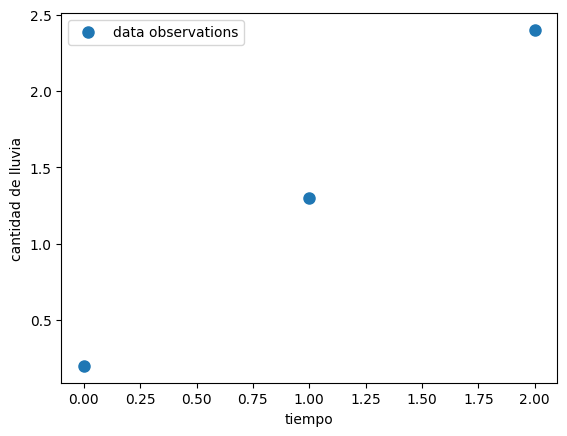

In [39]:
## =============== ##
## Define our data ##
## =============== ##

# input to our model. Represents time in seconds
x_data = np.array([0,1,2]).reshape(3,1)
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = np.array([0.2,1.3,2.4]).reshape(3,1)

## display
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')
plt.legend()

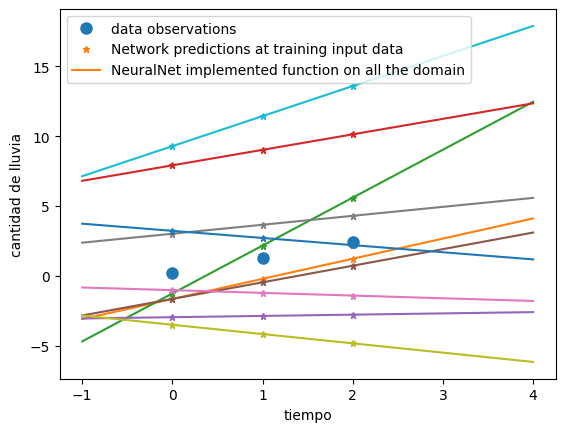

In [40]:
## ======================================================================= ##
## display possible functions depending on different values of $w$ and $b$ ##
## ======================================================================= ##

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')

## function implementing an activation function
def activation_function_linear(x):
    return x

## function that implements the computational graph
def computation_graph_linear(x,w,b):
    ''' This function represents a computational graph, a neural network, that implements a linear operation'''
    # this is the W^0 x from the theory above implemented using a transposition ;)
    y = activation_function_linear(np.matmul(x,w) + b)
    return y

## function that implements the computational graph
def computation_graph_linear_just_weight(x,w):
    ''' This function represents a computational graph, a neural network, that implements a linear operation, with no weight'''
    # this is the W^0 x from the theory above implemented using a transposition ;)
    y = activation_function_linear(np.matmul(x,w))
    return y

## function that initializes the values of a computational graph
def create_computation_graph_linear(n_in,n_out):
    ''' Create elements of the computational graph'''
    # parameters
    w = np.random.randn(n_in,n_out) + 1 # get a random value from standard normal distribution
    b = np.random.randn(n_out,)*5 # get a random value from Gaussian with mean 0 and standard deviation 5.

    return w,b

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(10):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 5, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
    else:
        plt.plot(x_data, y_pred,'*', markersize = 5,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

plt.legend()

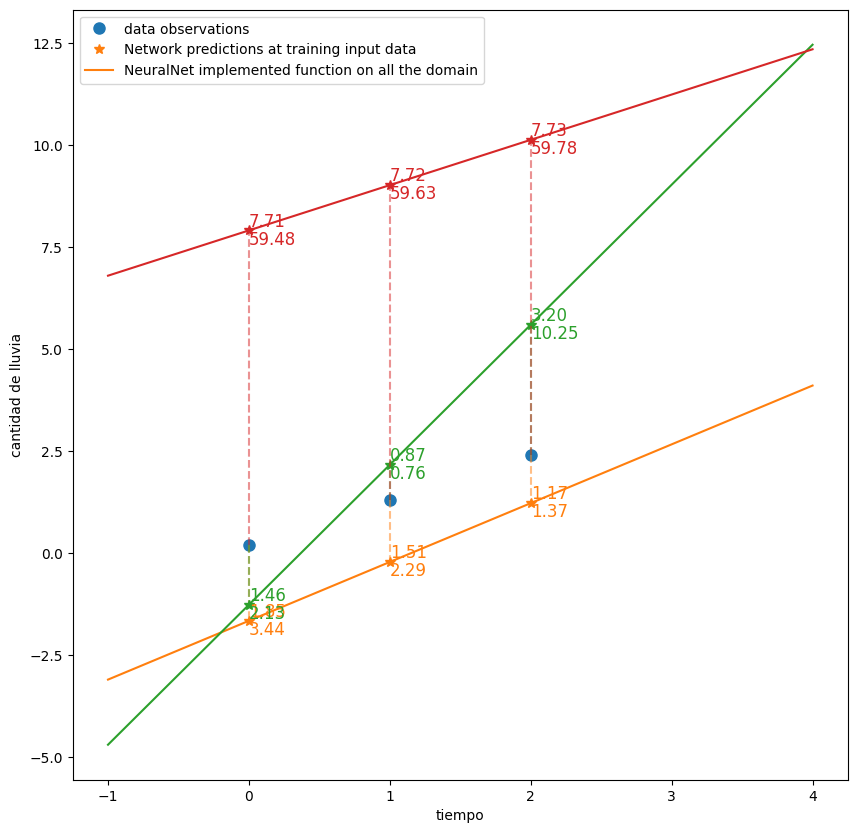

In [41]:
## ====================================== ##
## display loss of each possible function ##
## ====================================== ##
## Let's see the associated loss to each possible function and each prediction of this function at the training points.
## We show two different losses: squared (top) and absolute ( bottom )
## I repeat code from above but computing and plotting the loss.

## function implementing squared loss function
def squared_loss_function(y_pred,t):
    return (y_pred-t)**2

def absolute_loss_function(y_pred,t):
    return np.abs(y_pred-t)

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.figure(figsize = (10,10))
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    # compute the two losses at the predictions
    squared_loss = squared_loss_function(y_pred, t_data)
    absolute_loss = absolute_loss_function(y_pred, t_data)

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 7, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
      
    else:
        plt.plot(x_data, y_pred,'*', markersize = 7,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

    ## plot squared loss associated at each point
    for xi, yi, sl in zip(x_data,y_pred,squared_loss):
        plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='top', color = f"C{i+1}" ) 

    ## plot absolute loss associated at each point
    for xi, yi, sl in zip(x_data,y_pred,absolute_loss):
        plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='bottom', color = f"C{i+1}" ) 

    # draw line between dots to highliht what the loss measures
    for xi,t_d,y_p in zip(x_data,t_data,y_pred):
        plt.plot([xi,xi], [t_d, y_p], '--',color = f"C{i+1}", alpha = 0.5)

plt.legend()

Text(0, 0.5, 'absolute loss function')

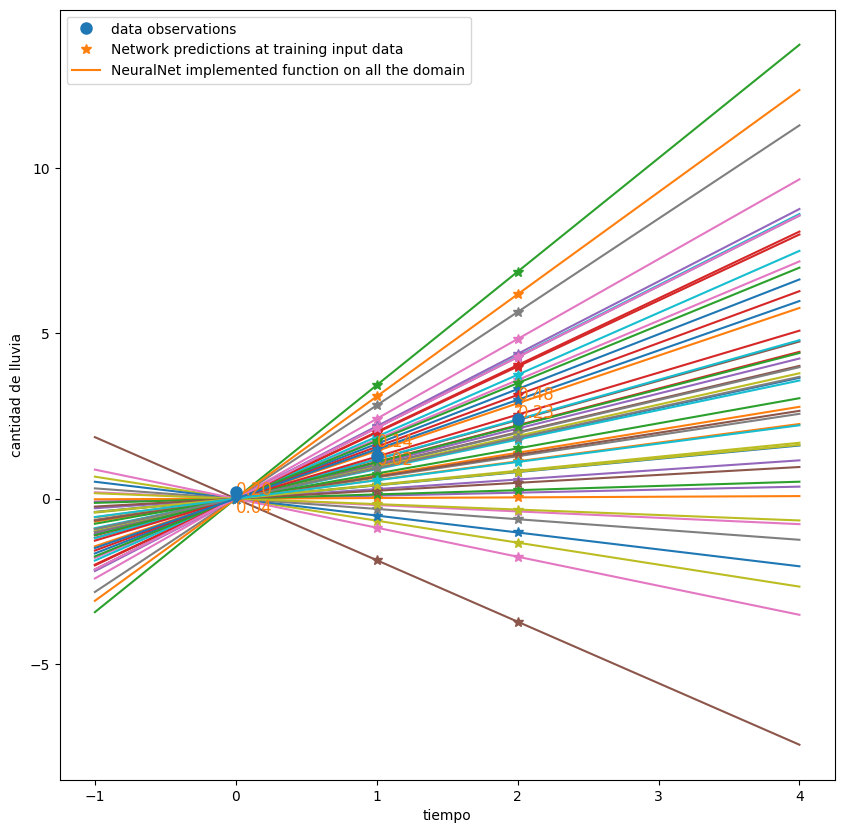

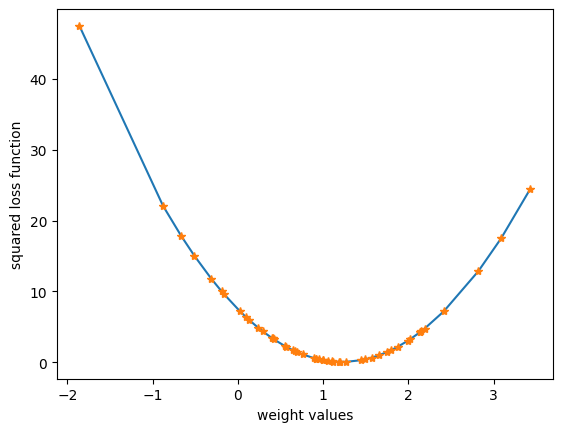

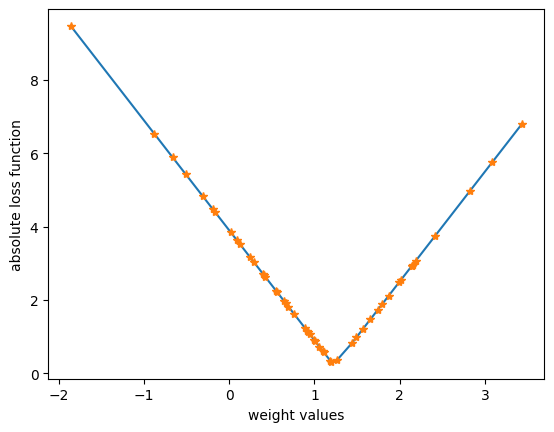

In [42]:
## ======================================================================== ##
## display loss as a function of parameters (loss incurred by each network) ##
## ======================================================================== ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the parameters.
## We show two different losses: squared (top) and absolute ( bottom )
## I repeat code from above but computing and plotting the loss.

## function implementing squared loss function
def squared_loss_function(y_pred,t):
    return (y_pred-t)**2

def absolute_loss_function(y_pred,t):
    return np.abs(y_pred-t)

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.figure(figsize = (10,10))
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations', zorder = 200)
plt.xlabel('tiempo')
plt.ylabel('cantidad de lluvia')

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
squared_loss_acc = []
absolute_loss_acc = []
w_acc = []
for i in range(50):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear_just_weight(x_range,w)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear_just_weight(x_data,w)

    # compute the two losses at the predictions
    squared_loss = squared_loss_function(y_pred, t_data)
    absolute_loss = absolute_loss_function(y_pred, t_data)

    # acumulate loss and parameter used
    squared_loss_acc.append(np.sum(squared_loss))
    absolute_loss_acc.append(np.sum(absolute_loss))
    w_acc.append(np.squeeze(w))

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 7, color = f"C{i+1}", label = 'Network predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'NeuralNet implemented function on all the domain' )
      
    else:
        plt.plot(x_data, y_pred,'*', markersize = 7,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")

    # plot loss associated to just first three lines to see it better.
    if i == 0:
        
        ## plot squared loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,squared_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='top', color = f"C{i+1}" ) 
            
        ## plot absolute loss associated at each point
        for xi, yi, sl in zip(x_data,y_pred,absolute_loss):
            plt.text(xi, yi, f'{sl[0]:.2f}', fontsize=12, va='bottom', color = f"C{i+1}" ) 
    
        # draw line between dots to highliht what the loss measures
        for xi,t_d,y_p in zip(x_data,t_data,y_pred):
            plt.plot([xi,xi], [t_d, y_p], '--',color = f"C{i+1}", alpha = 0.5)

plt.legend()

plt.figure()
# sort w_acc
idx = np.argsort(w_acc)

plt.plot(np.array(w_acc)[idx], np.array(squared_loss_acc)[idx])
plt.plot(np.array(w_acc)[idx], np.array(squared_loss_acc)[idx],'*')
plt.xlabel('weight values')
plt.ylabel('squared loss function')

plt.figure()
plt.plot(np.array(w_acc)[idx], np.array(absolute_loss_acc)[idx])
plt.plot(np.array(w_acc)[idx], np.array(absolute_loss_acc)[idx],'*')
plt.xlabel('weight values')
plt.ylabel('absolute loss function')